In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

from utils import (
    load_and_prepare_data,
    categorize_intervals,
    get_spike_columns,
    analyze_unit_activity,
    analyze_activity_by_duration,
    analyze_spike_counts,
    create_activity_heatmap_data,
    print_summary_statistics,
    print_data_overview,
    print_unit_count_info,
    print_table_headers,
    print_unit_explorer_header,
    print_export_info
)

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Load and prepare the data
csv_path = '../Data/semi_from_table_designer.csv'
df = load_and_prepare_data(csv_path)

# Quick data overview
print_data_overview(df)
display(df.head())

# Categorize intervals and get spike information
categorized_intervals = categorize_intervals(df)
event_presence_cols, event_count_cols, unit_numbers = get_spike_columns(df)

print_unit_count_info(unit_numbers)

Loading data from: ../Data/semi_from_table_designer.csv
Data loaded: 28336 rows, 93 columns

 Data Shape: (28336, 93)
 Time range: 7347385 to 25911340
 Duration range: 148ms to 751ms


,pico_Interval Start,pico_Interval End,pico_Interval Duration,spikes_28_Event Presence,spikes_15_Event Presence,spikes_0_Event Presence,spikes_29_Event Presence,spikes_14_Event Presence,spikes_1_Event Presence,spikes_17_Event Presence,...,spikes_35_Event Count,spikes_36_Event Count,spikes_37_Event Count,spikes_38_Event Count,spikes_39_Event Count,spikes_40_Event Count,spikes_41_Event Count,spikes_42_Event Count,spikes_43_Event Count,spikes_44_Event Count
0,7347385.0,7348134.0,749.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7348885.0,7349634.0,749.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7350385.0,7351135.0,750.0,1,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
3,7351885.0,7352635.0,750.0,0,0,0,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,7353385.0,7354135.0,750.0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0



=== INTERVAL DURATION CATEGORIZATION ===
150±4 ms intervals: 12670 (44.7%)
300±4 ms intervals: 10529 (37.2%)
750±4 ms intervals: 5127 (18.1%)
Other durations: 10 intervals

=== SPIKE UNIT INFORMATION ===
Number of spike units: 45
Unit numbers: 0 to 44
Event presence columns: 45
Event count columns: 45

🔢 Found 45 spike units (Unit 0 to Unit 44)


In [4]:
# Analyze unit activity patterns
activity_df = analyze_unit_activity(df, event_presence_cols)
count_df = analyze_spike_counts(df, event_count_cols)
duration_activity = analyze_activity_by_duration(df, categorized_intervals, event_presence_cols)
heatmap_df = create_activity_heatmap_data(categorized_intervals, event_presence_cols)


=== UNIT ACTIVITY ANALYSIS ===
Most active units (top 5):
  Unit  9: 15144 intervals ( 53.4%)
  Unit  7: 10865 intervals ( 38.3%)
  Unit 27:  7042 intervals ( 24.9%)
  Unit 40:  4545 intervals ( 16.0%)
  Unit 23:  4038 intervals ( 14.3%)

Least active units (bottom 5):
  Unit 35:     0 intervals (  0.0%)
  Unit 30:     0 intervals (  0.0%)
  Unit 33:     0 intervals (  0.0%)
  Unit 31:     0 intervals (  0.0%)
  Unit 32:     0 intervals (  0.0%)

=== SPIKE COUNT ANALYSIS ===
Units with most total spikes (top 5):
  Unit  9:  18625 total spikes, max 11 per interval, mean 0.66
  Unit  7:  14534 total spikes, max  9 per interval, mean 0.51
  Unit 40:   7968 total spikes, max 11 per interval, mean 0.28
  Unit 27:   7614 total spikes, max  4 per interval, mean 0.27
  Unit  8:   7141 total spikes, max 13 per interval, mean 0.25

=== ACTIVITY BY INTERVAL DURATION ===

150ms intervals analysis:
  Top 3 most active units:
    Unit  9: 5124/12670 intervals ( 40.4%)
    Unit  7: 2379/12670 interv

In [5]:
# Display top 15 most active units table
headers = print_table_headers()
print("\n" + "="*headers['top_active'][1])
print(headers['top_active'][0])
print("="*headers['top_active'][1])

top_15_active = activity_df.head(15)[['Unit', 'Active_Intervals', 'Activity_Rate_Percent']].copy()
top_15_active['Rank'] = range(1, 16)
top_15_active = top_15_active[['Rank', 'Unit', 'Active_Intervals', 'Activity_Rate_Percent']]
top_15_active.columns = ['Rank', 'Unit #', 'Active Intervals', 'Activity Rate (%)']

display(top_15_active.style.format({
    'Unit #': 'Unit {:d}',
    'Active Intervals': '{:,d}',
    'Activity Rate (%)': '{:.1f}%'
}).background_gradient(subset=['Active Intervals', 'Activity Rate (%)'], cmap='YlOrRd'))


📋 TOP 15 MOST ACTIVE UNITS (by interval count)


,Rank,Unit #,Active Intervals,Activity Rate (%)
21,1,Unit 9,"15,144",53.4%
17,2,Unit 7,"10,865",38.3%
29,3,Unit 27,"7,042",24.9%
40,4,Unit 40,"4,545",16.0%
27,5,Unit 23,"4,038",14.3%
12,6,Unit 10,"3,676",13.0%
15,7,Unit 6,"3,192",11.3%
19,8,Unit 8,"2,876",10.1%
24,9,Unit 24,"2,763",9.8%
18,10,Unit 20,"2,568",9.1%


In [6]:
# Display top 15 spike producing units table
headers = print_table_headers()
print("\n" + "="*headers['top_spikes'][1])
print(headers['top_spikes'][0])
print("="*headers['top_spikes'][1])

top_15_spikes = count_df.head(15)[['Unit', 'Total_Spikes', 'Mean_Spikes_Per_Interval', 'Max_Spikes_Per_Interval']].copy()
top_15_spikes['Rank'] = range(1, 16)
top_15_spikes = top_15_spikes[['Rank', 'Unit', 'Total_Spikes', 'Mean_Spikes_Per_Interval', 'Max_Spikes_Per_Interval']]
top_15_spikes.columns = ['Rank', 'Unit #', 'Total Spikes', 'Mean Spikes/Interval', 'Max Spikes/Interval']

display(top_15_spikes.style.format({
    'Unit #': 'Unit {:d}',
    'Total Spikes': '{:,d}',
    'Mean Spikes/Interval': '{:.2f}',
    'Max Spikes/Interval': '{:d}'
}).background_gradient(subset=['Total Spikes', 'Mean Spikes/Interval'], cmap='Blues'))


📈 TOP 15 SPIKE PRODUCING UNITS (by total spike count)


,Rank,Unit #,Total Spikes,Mean Spikes/Interval,Max Spikes/Interval
21,1,Unit 9,"18,625",0.66,11
17,2,Unit 7,"14,534",0.51,9
40,3,Unit 40,"7,968",0.28,11
29,4,Unit 27,"7,614",0.27,4
19,5,Unit 8,"7,141",0.25,13
27,6,Unit 23,"6,175",0.22,8
18,7,Unit 20,"4,767",0.17,9
12,8,Unit 10,"4,598",0.16,6
15,9,Unit 6,"3,322",0.12,3
24,10,Unit 24,"3,150",0.11,5


In [7]:
# Display bottom 15 least active units table
headers = print_table_headers()
print("\n" + "="*headers['bottom_active'][1])
print(headers['bottom_active'][0])
print("="*headers['bottom_active'][1])

bottom_15_active = activity_df.tail(15)[['Unit', 'Active_Intervals', 'Activity_Rate_Percent']].copy().iloc[::-1]
bottom_15_active['Rank'] = range(1, 16)
bottom_15_active = bottom_15_active[['Rank', 'Unit', 'Active_Intervals', 'Activity_Rate_Percent']]
bottom_15_active.columns = ['Rank (from bottom)', 'Unit #', 'Active Intervals', 'Activity Rate (%)']

display(bottom_15_active.style.format({
    'Unit #': 'Unit {:d}',
    'Active Intervals': '{:,d}',
    'Activity Rate (%)': '{:.1f}%'
}).background_gradient(subset=['Active Intervals', 'Activity Rate (%)'], cmap='Reds_r'))


📉 BOTTOM 15 LEAST ACTIVE UNITS (by interval count)


,Rank (from bottom),Unit #,Active Intervals,Activity Rate (%)
32,1,Unit 32,0,0.0%
31,2,Unit 31,0,0.0%
33,3,Unit 33,0,0.0%
30,4,Unit 30,0,0.0%
35,5,Unit 35,0,0.0%
4,6,Unit 14,0,0.0%
39,7,Unit 39,1,0.0%
43,8,Unit 43,1,0.0%
44,9,Unit 44,14,0.0%
41,10,Unit 41,27,0.1%


In [8]:
# Activity by interval duration summary
headers = print_table_headers()
print("\n" + "="*headers['duration_summary'][1])
print(headers['duration_summary'][0])
print("="*headers['duration_summary'][1])

duration_summary_data = []
for duration_name, duration_df in categorized_intervals.items():
    total_intervals = len(duration_df)
    if total_intervals > 0:
        total_activity_events = sum(duration_df[col].sum() for col in duration_df.columns if 'Event Presence' in col)
        avg_activity_per_interval = total_activity_events / total_intervals
        active_units = sum((duration_df[col].sum() > 0) for col in duration_df.columns if 'Event Presence' in col)
        total_spikes = sum(duration_df[col.replace('Presence', 'Count')].sum() for col in duration_df.columns if 'Event Presence' in col)
    else:
        total_activity_events = 0
        avg_activity_per_interval = 0
        active_units = 0
        total_spikes = 0
        
    duration_summary_data.append({
        'Duration Category': duration_name,
        'Total Intervals': total_intervals,
        'Total Activity Events': total_activity_events,
        'Avg Events/Interval': avg_activity_per_interval,
        'Active Units': active_units,
        'Total Spikes': total_spikes
    })

duration_summary_df = pd.DataFrame(duration_summary_data)

display(duration_summary_df.style.format({
    'Total Intervals': '{:,d}',
    'Total Activity Events': '{:,d}',
    'Avg Events/Interval': '{:.2f}',
    'Active Units': '{:d}',
    'Total Spikes': '{:,d}'
}).background_gradient(subset=['Total Intervals', 'Total Activity Events', 'Total Spikes'], cmap='Greens'))


⏱️  ACTIVITY SUMMARY BY INTERVAL DURATION


,Duration Category,Total Intervals,Total Activity Events,Avg Events/Interval,Active Units,Total Spikes
0,150ms,"12,670","17,179",1.36,34,"17,871"
1,300ms,"10,529","25,660",2.44,37,"28,091"
2,750ms,"5,127","33,421",6.52,38,"55,874"


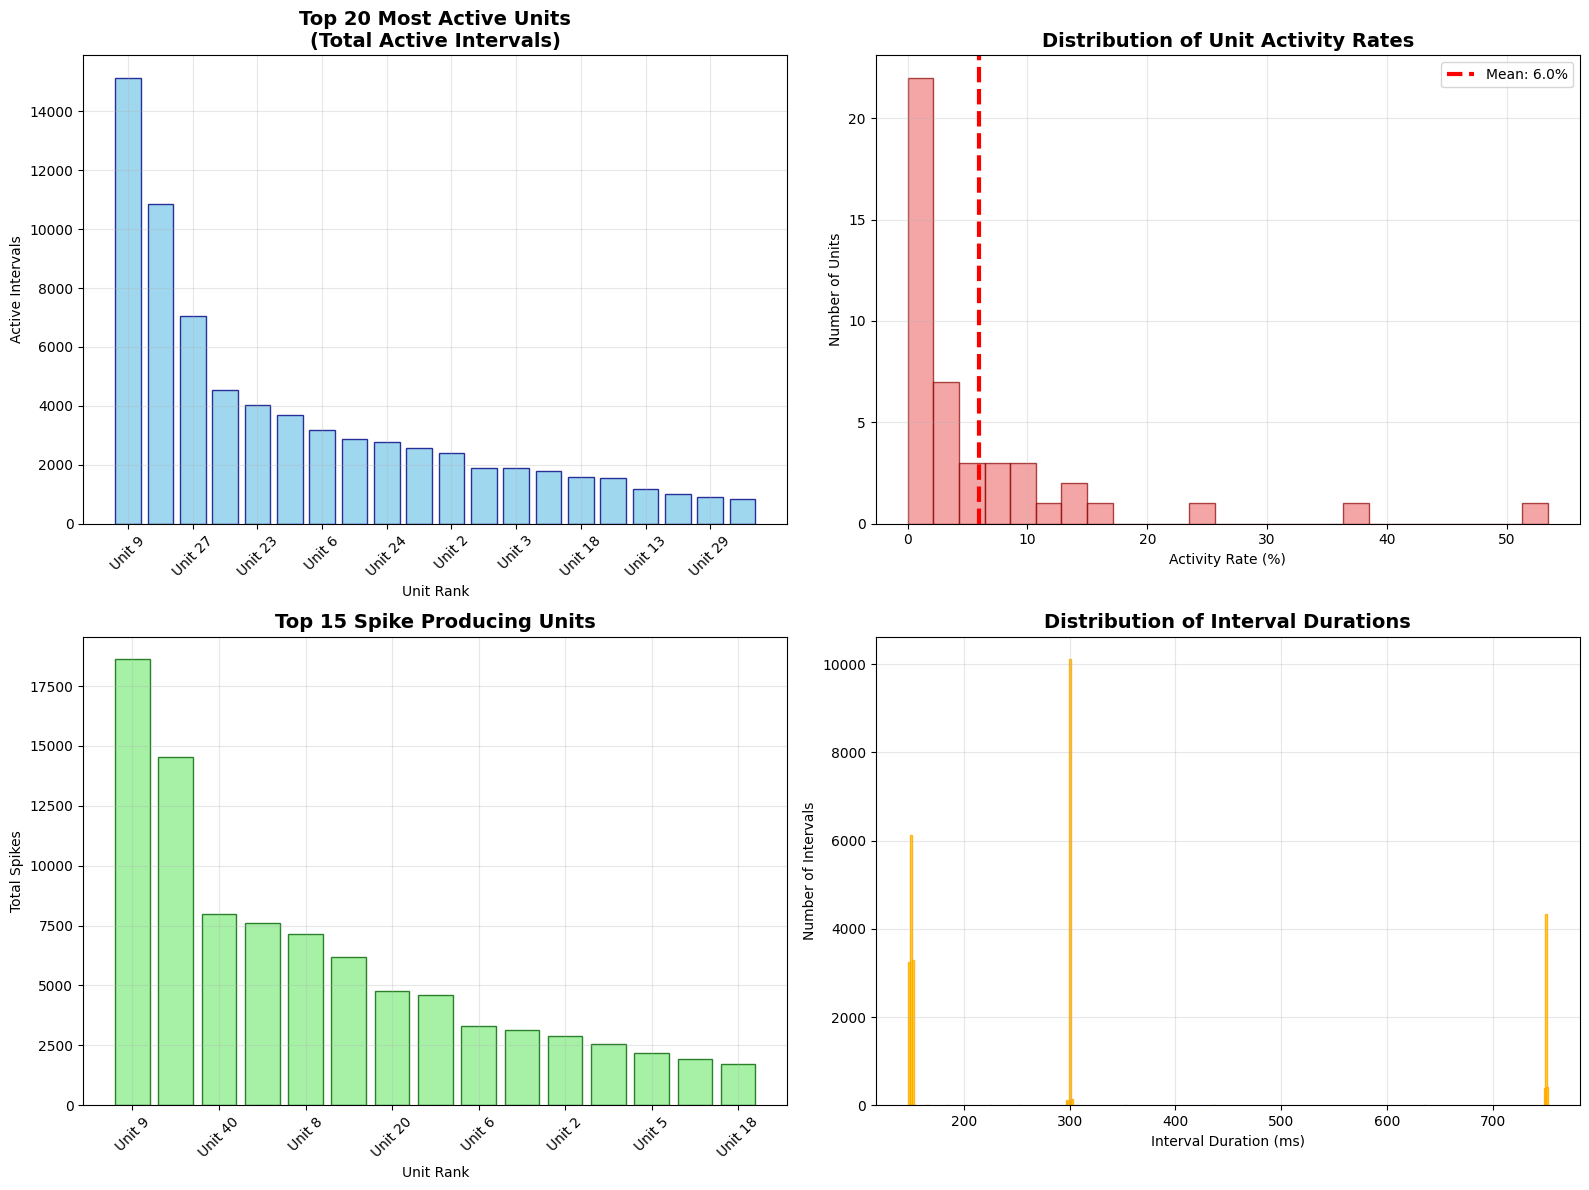

In [9]:
# Visualization 1: Unit Activity Overview
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Top 20 most active units
top_20_units = activity_df.head(20)
bars1 = ax1.bar(range(len(top_20_units)), top_20_units['Active_Intervals'], 
                color='skyblue', edgecolor='navy', alpha=0.8)
ax1.set_xlabel('Unit Rank')
ax1.set_ylabel('Active Intervals')
ax1.set_title('Top 20 Most Active Units\n(Total Active Intervals)', fontsize=14, fontweight='bold')
ax1.set_xticks(range(0, len(top_20_units), 2))
ax1.set_xticklabels([f"Unit {int(top_20_units.iloc[i]['Unit'])}" for i in range(0, len(top_20_units), 2)], rotation=45)
ax1.grid(True, alpha=0.3)

# Activity rate distribution
ax2.hist(activity_df['Activity_Rate_Percent'], bins=25, color='lightcoral', 
         edgecolor='darkred', alpha=0.7)
ax2.axvline(activity_df['Activity_Rate_Percent'].mean(), color='red', 
            linestyle='--', linewidth=3, label=f'Mean: {activity_df["Activity_Rate_Percent"].mean():.1f}%')
ax2.set_xlabel('Activity Rate (%)')
ax2.set_ylabel('Number of Units')
ax2.set_title('Distribution of Unit Activity Rates', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Top spike producers
top_15_spike = count_df.head(15)
bars3 = ax3.bar(range(len(top_15_spike)), top_15_spike['Total_Spikes'], 
                color='lightgreen', edgecolor='darkgreen', alpha=0.8)
ax3.set_xlabel('Unit Rank')
ax3.set_ylabel('Total Spikes')
ax3.set_title('Top 15 Spike Producing Units', fontsize=14, fontweight='bold')
ax3.set_xticks(range(0, len(top_15_spike), 2))
ax3.set_xticklabels([f"Unit {int(top_15_spike.iloc[i]['Unit'])}" for i in range(0, len(top_15_spike), 2)], rotation=45)
ax3.grid(True, alpha=0.3)

# Interval duration distribution
duration_counts = df['pico_Interval Duration'].value_counts().sort_index()
ax4.bar(duration_counts.index, duration_counts.values, color='gold', 
        edgecolor='orange', alpha=0.8, width=2)
ax4.set_xlabel('Interval Duration (ms)')
ax4.set_ylabel('Number of Intervals')
ax4.set_title('Distribution of Interval Durations', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

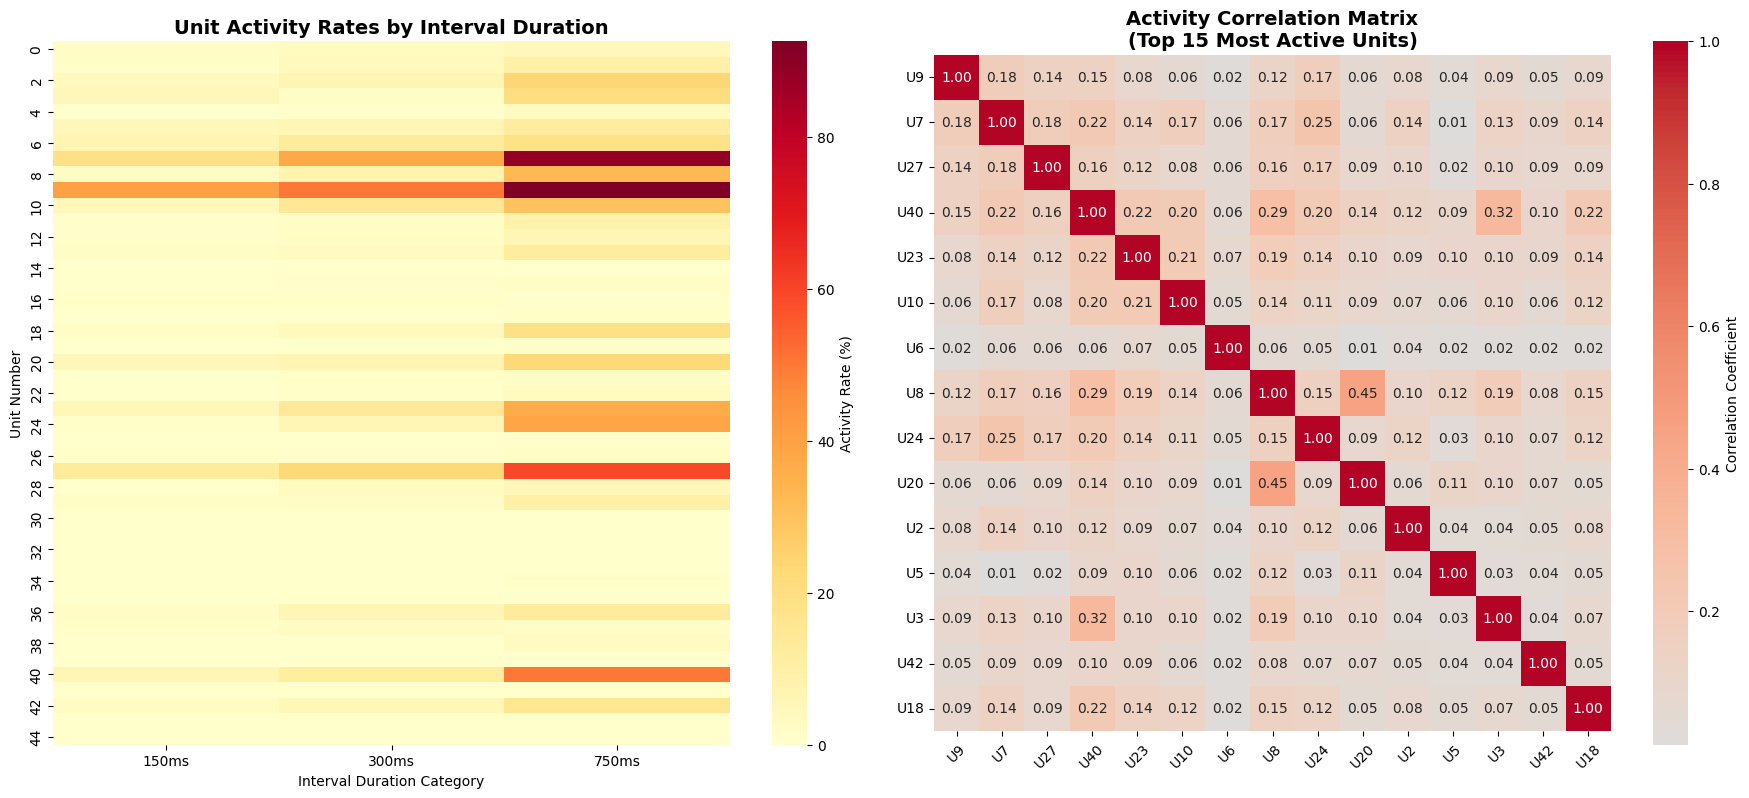

In [ ]:
# Visualization 2: Activity Heatmap and Correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Activity heatmap by duration
sns.heatmap(heatmap_df, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Activity Rate (%)'}, ax=ax1)
ax1.set_title('Unit Activity Rates by Interval Duration', fontsize=14, fontweight='bold')
ax1.set_xlabel('Interval Duration Category')
ax1.set_ylabel('Unit Number')

# Correlation matrix for top 15 most active units
top_units_for_corr = [int(unit) for unit in activity_df.head(15)['Unit'].tolist()]
presence_cols_top = [f'spikes_{unit}_Event Presence' for unit in top_units_for_corr]
correlation_matrix = df[presence_cols_top].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax2,
            fmt='.2f', square=True, cbar_kws={'label': 'Correlation Coefficient'})
ax2.set_title('Activity Correlation Matrix\n(Top 15 Most Active Units)', fontsize=14, fontweight='bold')
ax2.set_xticklabels([f'U{unit}' for unit in top_units_for_corr], rotation=45)
ax2.set_yticklabels([f'U{unit}' for unit in top_units_for_corr], rotation=0)

plt.tight_layout()
plt.show()

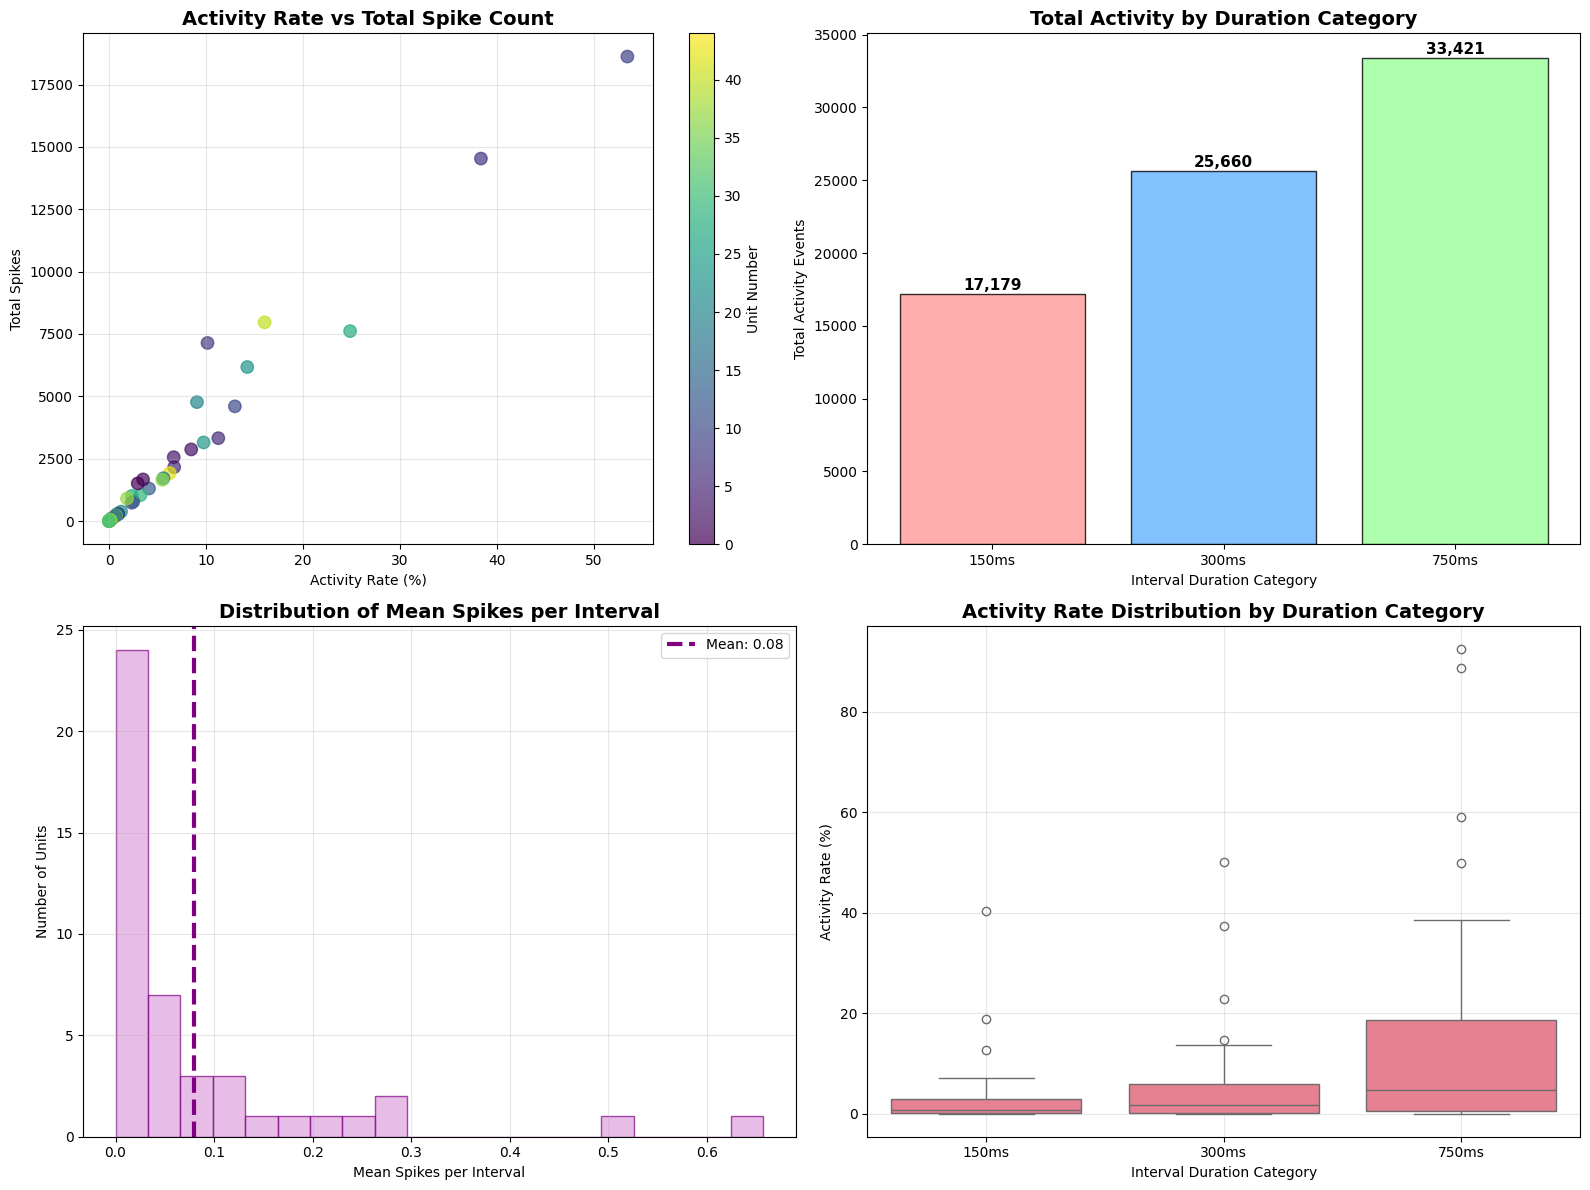

In [11]:
# Visualization 3: Advanced Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Scatter: Activity Rate vs Total Spike Count
merged_df = pd.merge(activity_df, count_df, on='Unit')
scatter = ax1.scatter(merged_df['Activity_Rate_Percent'], merged_df['Total_Spikes'], 
                     alpha=0.7, c=merged_df['Unit'], cmap='viridis', s=80)
ax1.set_xlabel('Activity Rate (%)')
ax1.set_ylabel('Total Spikes')
ax1.set_title('Activity Rate vs Total Spike Count', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=ax1, label='Unit Number')
ax1.grid(True, alpha=0.3)

# Activity by duration category
duration_names = list(duration_summary_df['Duration Category'])
total_activities = list(duration_summary_df['Total Activity Events'])
bars2 = ax2.bar(duration_names, total_activities,
                color=['#ff9999', '#66b3ff', '#99ff99'], edgecolor='black', alpha=0.8)
ax2.set_xlabel('Interval Duration Category')
ax2.set_ylabel('Total Activity Events')
ax2.set_title('Total Activity by Duration Category', fontsize=14, fontweight='bold')

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 50,
            f'{int(height):,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Mean spikes per interval distribution
ax3.hist(count_df['Mean_Spikes_Per_Interval'], bins=20, color='plum', 
         edgecolor='purple', alpha=0.7)
ax3.axvline(count_df['Mean_Spikes_Per_Interval'].mean(), color='purple', 
            linestyle='--', linewidth=3, label=f'Mean: {count_df["Mean_Spikes_Per_Interval"].mean():.2f}')
ax3.set_xlabel('Mean Spikes per Interval')
ax3.set_ylabel('Number of Units')
ax3.set_title('Distribution of Mean Spikes per Interval', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Box plot: Activity rates by duration category
activity_by_duration_list = []
for duration_name, duration_df in categorized_intervals.items():
    for col in event_presence_cols:
        if len(duration_df) > 0:
            activity_rate = duration_df[col].sum() / len(duration_df) * 100
        else:
            activity_rate = 0
        activity_by_duration_list.append({
            'Duration': duration_name,
            'Activity_Rate': activity_rate
        })

activity_by_duration_df = pd.DataFrame(activity_by_duration_list)
sns.boxplot(data=activity_by_duration_df, x='Duration', y='Activity_Rate', ax=ax4)
ax4.set_xlabel('Interval Duration Category')
ax4.set_ylabel('Activity Rate (%)')
ax4.set_title('Activity Rate Distribution by Duration Category', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🔍 INTERACTIVE UNIT EXPLORER
Analyzing top 4 most active units: [9, 7, 27, 40]


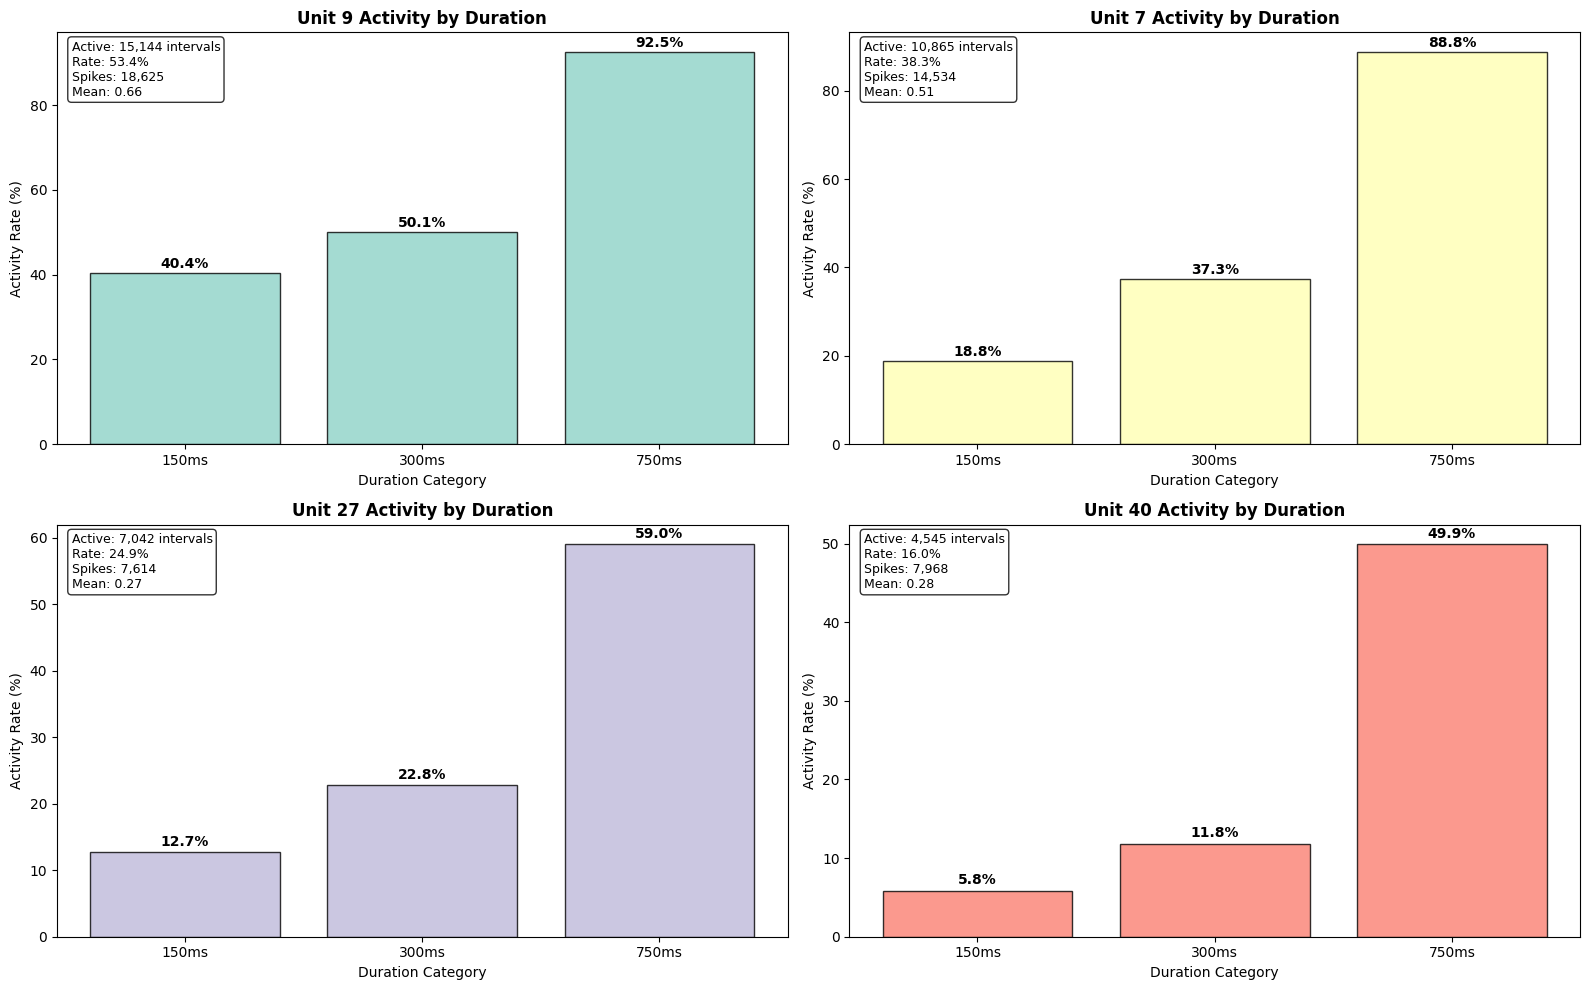

In [14]:
# Interactive Unit Explorer - Select specific units to analyze
print_unit_explorer_header()

def analyze_specific_units(unit_list):
    """
    Analyze specific units in detail
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    for i, unit in enumerate(unit_list[:4]):  # Limit to 4 units for visualization
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        
        # Convert unit to integer to match column naming
        unit = int(unit)
        presence_col = f'spikes_{unit}_Event Presence'
        count_col = f'spikes_{unit}_Event Count'
        
        # Activity across different durations
        duration_activity = []
        duration_labels = []
        for duration_name, duration_df in categorized_intervals.items():
            if len(duration_df) > 0:
                activity_rate = duration_df[presence_col].sum() / len(duration_df) * 100
            else:
                activity_rate = 0
            duration_activity.append(activity_rate)
            duration_labels.append(duration_name)
        
        bars = ax.bar(duration_labels, duration_activity, 
                     color=plt.cm.Set3(i), alpha=0.8, edgecolor='black')
        ax.set_title(f'Unit {unit} Activity by Duration', fontweight='bold')
        ax.set_ylabel('Activity Rate (%)')
        ax.set_xlabel('Duration Category')
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        # Get unit statistics
        unit_activity_stats = activity_df[activity_df['Unit'] == unit]
        unit_count_stats = count_df[count_df['Unit'] == unit]
        
        if not unit_activity_stats.empty and not unit_count_stats.empty:
            total_active = unit_activity_stats.iloc[0]['Active_Intervals']
            activity_rate = unit_activity_stats.iloc[0]['Activity_Rate_Percent']
            total_spikes = unit_count_stats.iloc[0]['Total_Spikes']
            mean_spikes = unit_count_stats.iloc[0]['Mean_Spikes_Per_Interval']
            
            ax.text(0.02, 0.98, f'Active: {int(total_active):,} intervals\nRate: {activity_rate:.1f}%\nSpikes: {int(total_spikes):,}\nMean: {mean_spikes:.2f}', 
                   transform=ax.transAxes, fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Analyze top 4 most active units
top_4_units = [int(unit) for unit in activity_df.head(4)['Unit'].tolist()]
print(f"Analyzing top 4 most active units: {top_4_units}")
analyze_specific_units(top_4_units)

In [ ]:
# Final summary and export capabilities
print_summary_statistics(df, activity_df, count_df)

# Export data and save files
print_export_info(df, activity_df, count_df, heatmap_df, categorized_intervals)

# Also save the duration summary
from pathlib import Path
output_dir = Path('../Output')
duration_summary_df.to_csv(output_dir / 'duration_summary.csv', index=False)